# Exercise 1: Analytical exercises

# Exercise 2: Making your own data and exploring scikit-learn

In [1]:
# LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# PARAMETERS
n = 100         # Number of elements
p = 3           # Number of features

# INPUT DATA
# We are creating an array of size (n, 1), 
# in which every element is sampled from a uniform distribution over [0, 1).
x = np.random.rand(n, 1)

# OUTPUT DATA
y = 2.0+5*x*x+0.1*np.random.randn(n, 1)

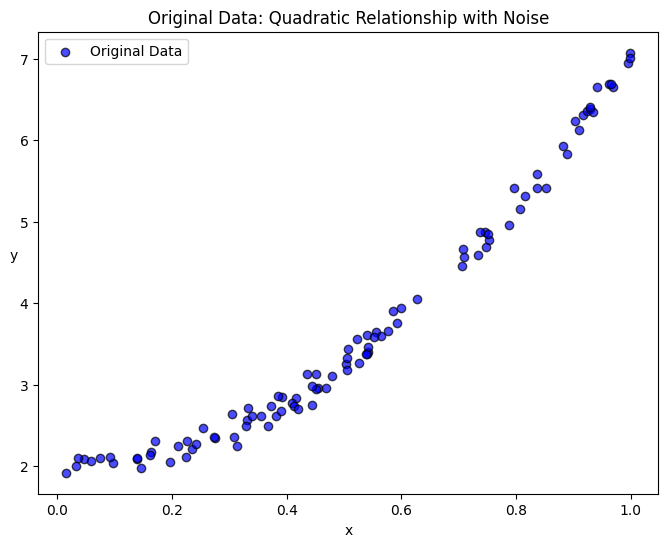

In [2]:
# PLOTTING ORIGINAL DATA
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, edgecolor='k', label='Original Data')  # Ensure label is correctly set
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Original Data: Quadratic Relationship with Noise')
plt.legend()
plt.show()

## Theory explanation

### Introduction

We have the following quadratic polynomial function:
$$
y(x) = 2 + 5x^2 + \varepsilon
$$
where $\varepsilon$ represents added Gaussian noise.

The output of this function is determined by the value of the variable $x$, that we randomly sampled 100 times from a uniform distribution over $[0, 1)$.

Our goal is to use a **polynomial regression model** to find the best values for $\beta_0$, $\beta_1$, and $\beta_2$ so that the equation 
$$
y = \beta_0 + \beta_1x + \beta_2x^2
$$ 
fits the generated data points as closely as possible.

### The model: Polynomial regression

In general, we can write a polynomial regression model as follows:
$$
\tilde{y}_i =  \sum_{j = 0}^{p - 1} \beta_jx_i^j
$$
Where:

- $\tilde{y}_i$ is the predicted value of $y$ for the $i$-th observation.
- $\beta_j$ are the coefficients of the model.
- $x_i^j$ are the powers of the $i$-th input $x_i$.
- $p$ is the degree of the polynomial plus one.

We can also rewrite the whole equation above using the matrix notation. 

We construct a **design matrix** (also called **feature matrix**) $\mathbf{X}$ where each row corresponds to an observation $x_i$, and each column corresponds to a power of $x_i$ from $x_i^0$ (which is always 1) to $x_i^{p-1}$. 

For a dataset with $n$ observations (data points) and a polynomial of degree $p-1$, the design matrix $\mathbf{X}$ will be an $n \times p$ matrix:
$$
\mathbf{X} = \begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^{p-1} \\
1 & x_2 & x_2^2 & \cdots & x_2^{p-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^{p-1}
\end{bmatrix}
$$

Afterwards, we organize the coefficients $\beta_j$ into a column vector $\boldsymbol{\beta}$:
$$
\boldsymbol{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_{p-1}
\end{bmatrix}
$$

Finally, the vector of predicted values $\tilde{\mathbf{y}}$ (for all observations) is then:
$$
\tilde{\mathbf{y}} = \begin{bmatrix}
\tilde{y}_1 \\
\tilde{y}_2 \\
\vdots \\
\tilde{y}_n
\end{bmatrix}
= \mathbf{X}\boldsymbol{\beta} 
$$


### Cost function: $MSE$

In order to evaluate the accuracy of the model, we need to identify a cost function that will help us determine the "*cost*" or "*loss*" associated with a given set of predictions made by the model. Specifically, we will evaluate our model using the **Mean Squared Error** ($MSE$). We indicate the cost function as $C(\beta)$, because its output is related to the chosen parameters $\beta$:
$$
C(\beta) = MSE = \frac{1}{n} \sum_{i=0}^{n-1} \left( y_i - \tilde{y}_i \right)^2
$$
Where:
- $n$ is the number of observations.
- $y_i$ is the actual value for the $i$-th observation.
- $\tilde{y_i}$ is the predicted value for the $i$-th observation.

We can rewrite the $MSE$ equation for our specific case, by expliciting the $\tilde{y}$ variable:
$$
C(\beta) = MSE = \frac{1}{n} \sum_{i=0}^{n-1} \left(y_i - \sum_{j=0}^{p-1}\beta_jx_i^j \right)^2
$$

Finally, we can formulate the above equation using matrix notation:
$$
C(\beta) = MSE = \frac{1}{n} \left( \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \right)^\top \left( \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \right)
$$

### Parameter estimation: Least squares

In order to estimate the $\beta$ parameters required by the polynomial regression model, we use the well-known **least squares method**.

We call optimal $\boldsymbol{\beta}$, denoted by $\hat{\boldsymbol{\beta}}$, the column vector that minimizes the cost function $C(\beta)$:

$$
\frac{\partial C}{\partial \boldsymbol{\beta}} = 0 = -\frac{2}{n} \mathbf{X}^\top \left( \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \right) \implies \hat{\boldsymbol{\beta}} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$

After having introduced all the necessary equations, we can move on to the actual resolution of the exercise.

### Code solution

We created two different matrixes:
- The first one represents a specific case, in which the number of features is equal to 3.

$$
\begin{bmatrix}
1 & 2 & 3\\
a & b & c
\end{bmatrix}
$$

- The second one represents a generalized case, that changes according to the given number of features (x_j).

In [3]:
# for i in range(len(x)):
#     X = np.vstack([np.ones_like(x[i]), x[i], x[i]**2]).T

In [4]:
def matrix_creation(n, p):                              # n represents the number of rows (observations), 
                                                        # while p represents the number of columns (features)
    X = np.ones((n, p))
    for i in range(len(x)):
        for j in range(p):
            X[i,j] = X[i,j] * (x[i]**j).item()
    return X

In [5]:
X = matrix_creation(n,p)

In [6]:
beta = np.linalg.pinv(X.T @ X) @ X.T @ y
beta

array([[ 2.01750473],
       [-0.11949209],
       [ 5.15354685]])

In [7]:
y_tilde = X @ beta

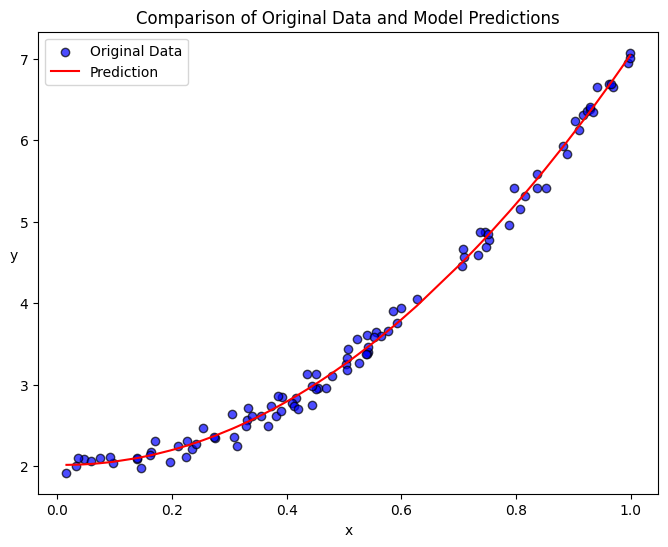

In [8]:
x_sorted = np.sort(x, axis=0)                       # CHIEDERE A ELISA PERCHE' HA FATTO np.sort
y_tilde_sorted = np.sort(y_tilde, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, edgecolor='k', label='Original Data')
plt.plot(x_sorted, y_tilde_sorted, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Comparison of Original Data and Model Predictions')
plt.legend()
plt.show()

### Mean squared error and $R^2$

In [9]:
def mse_and_r2(y_real, y_pred):
    
    mse = 1/n * (y_real - y_pred).T @ (y_real - y_pred)
    
    RSS = (y_real - y_pred).T @ (y_real - y_pred)                   
    TSS = y.T @ y - 1/n * (y.T @ np.ones(y.shape[0])) * (np.ones(y.shape[0]).T @ y) # MODIFICARE y
    r2 = 1 - (RSS/TSS)
    
    print('The mean squared error is:', mse.item()) 
    print('The R2 score is:', r2.item())
    return mse, r2

In [10]:
mse, r2 = mse_and_r2(y, y_tilde)

The mean squared error is: 0.010832565783624553
The R2 score is: 0.9953845574905854


### Scikit-learn

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# PolynomialFeatures(include_bias = True):  
model = make_pipeline(PolynomialFeatures(degree = 2, include_bias = True), LinearRegression(fit_intercept = False)) 

model.fit(x, y)

beta_sklearn = model.named_steps['linearregression'].coef_

print("Scikit-learn computation of parameters:", beta_sklearn)

Scikit-learn computation of parameters: [[ 2.01750473 -0.11949209  5.15354685]]


In [12]:
y_tilde_sklearn = X @ beta_sklearn.T

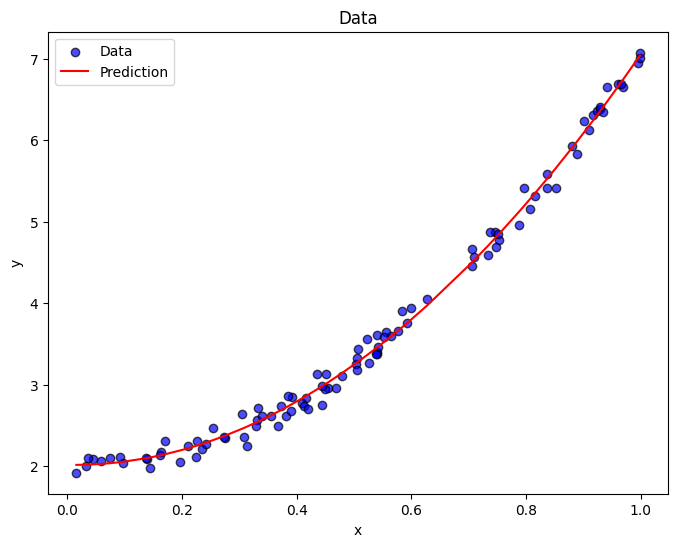

In [13]:
x_sorted = np.sort(x, axis=0)
y_tilde_sklearn_sorted = np.sort(y_tilde_sklearn, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, edgecolor='k', label='Data')
plt.plot(x_sorted, y_tilde_sklearn_sorted, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend()
plt.show()

In [14]:
def mse_and_r2_sklearn(y_real, y_tilde_sklearn):
    mse_sklearn = mean_squared_error(y_real, y_tilde_sklearn)
    r2_sklearn = r2_score(y_real, y_tilde_sklearn)
    print('The mean squared error computed with scikit-learn is:', mse_sklearn) 
    print('The R2 score computed with scikit-learn is:', r2_sklearn)
    return mse_sklearn, r2_sklearn

In [15]:
mse_sklearn, r2_sklearn = mse_and_r2_sklearn(y, y_tilde_sklearn)

The mean squared error computed with scikit-learn is: 0.010832565783624556
The R2 score computed with scikit-learn is: 0.9953845574905854


In [16]:
# Betas

for i in range(len(beta)):
    if beta[i] > beta_sklearn[0,i]:
        print('Manually beta is bigger')
    elif beta[i] < beta_sklearn[0,i]:
        print('Manually beta is smaller')
    else:
        print('They are equal')

Manually beta is smaller
Manually beta is bigger
Manually beta is smaller


Variazione del rumore e discussione dei cambaimentei ottenuti, magari fare anche un plot

# Exercise 3: Split data in test and training data

In [17]:
np.random.seed()
n = 100
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x - 2)**2) + np.random.normal(0, 0.1, x.shape)

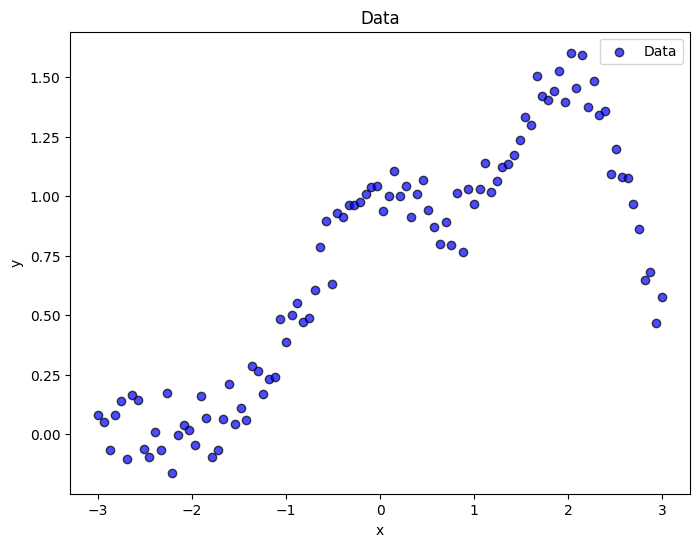

In [18]:
# Plot dei dati

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, edgecolor='k', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend()
plt.show()

In [19]:
def split_data(n, p, percentage):
    X = matrix_creation(n, p)
    portion_X = int(X.shape[0] * (percentage/100))
    X_train = X[:portion_X]
    X_test = X[portion_X:]
    portion_y = int(y.shape[0] * (percentage/100))
    y_train = y[:portion_y]
    y_test = y[portion_y:]
    return X, X_train, X_test, y_train, y_test

In [20]:
p = 6
percentage = 80
X, X_train, X_test, y_train, y_test = split_data(n, p, percentage)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)

R2_train = r2_score(y_train, y_train_pred)
R2_test = r2_score(y_test, y_test_pred)

table_shape = PrettyTable()
table_shape.field_names = ["", "MSE", "R2"]
table_shape.add_row(["Training set", MSE_train, R2_train])
table_shape.add_row(["Testing set", MSE_test, R2_test])
print(table_shape)

+--------------+----------------------+--------------------+
|              |         MSE          |         R2         |
+--------------+----------------------+--------------------+
| Training set | 0.009854845746223456 | 0.957604086951217  |
| Testing set  |  27.717288961249416  | -228.1601697335305 |
+--------------+----------------------+--------------------+


In [ ]:
x_sorted = np.sort(x, axis=0)
y_train_pred_sorted = np.sort(y_train_pred, axis=0)
y_test_pred_sorted = np.sort(y_test_pred, axis=0)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, edgecolor='k', label='Data')
plt.plot(x_sorted, y_test_pred_sorted, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend()
plt.show()

In [ ]:
def train_model(X_train, y_train, model):
    
    return model

def train_and_evaluate(df, target, model, columns_to_exclude=[]):
    X, y = prepare_data(df, target, columns_to_exclude)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)

    evaluate_and_plot(X_test, y_test, model_train, target)

def evaluate_and_plot(X_test, y_test, model, target):
    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2_Score = r2_score(y_test, y_pred)
    # intercept = model.intercept_

    results = PrettyTable()
    results.field_names = ["Metric", "Value"]
    results.add_row(["Mean Squared Error", MSE])
    results.add_row(["Mean Absolute Error", MAE])
    results.add_row(["R2 Score", R2_Score])
    # results.add_row(["Intercept", intercept])
    print(results)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values[:100], label='Actual', marker='o')
    plt.plot(y_pred[:100], label='Predicted', linestyle='--')
    plt.xlabel('Sample')
    plt.ylabel(target)
    plt.title(f'Actual vs Predicted {target}')
    plt.legend()
    # plt.savefig(f'images/Actual_Predicted_{target}_with_{model}.png', dpi=400, bbox_inches='tight')
    plt.show()

The mean squared error computed with scikit-learn is: 0.020031055824773908
The R2 score computed with scikit-learn is: 0.9264632279105519
